# Final Project

## E- Commerce Product Range Analysis

****Analyze the store's product range.

- Carry out exploratory data analysis
- Analyze the product range
- Formulate and test statistical hypotheses

**Description of the data:**

The dataset contains the transaction history of an online store that sells household goods.

The file `ecommerce_dataset_us.csv` contains the following columns:

`InvoiceNo` — order identifier

`StockCode` — item identifier

`Description` — item name

`Quantity`

`InvoiceDate` — order date

`UnitPrice` — price per item

`CustomerID`

## Table of content:

#### Step. 1    Load the data and read it
#### Step. 2      Data Preprocessing
#### Step. 3         Exploratory Data Analysis
#### Step. 4           Categorizing Products
#### Step. 5              RFM Analysis
#### Step. 6              Product Range & Basket Analysis
#### Step. 7              Hypothesis statistical tests
#### Step. 8              Conclusions

In [1]:
!pip install pymystem3

In [2]:
!pip install -U plotly

In [3]:
!pip install -U mlxtend

## step 1.  Load the data and read it

In [4]:
import pandas as pd
import numpy as np
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn.cluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")
from pymystem3 import Mystem
from collections import Counter
import nltk
from nltk.stem import WordNetLemmatizer
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from scipy import stats 
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to C:\Users\Meir
[nltk_data]     Biran\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Meir
[nltk_data]     Biran\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Meir Biran\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [5]:
try:
    df= pd.read_csv('datasets/ecommerce_dataset_us.csv', sep='\t')
except:
    df=pd.read_csv('ecommerce_dataset_us.csv', sep='\t')

In [6]:
#Loading the data
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
350788,567656,22813,PACK 3 BOXES BIRD PANNETONE,3,09/19/2019 14:40,4.13,14096.0
531823,580972,23455,SMALL PARLOUR PICTURE FRAME,6,12/04/2019 15:10,2.89,15194.0
156806,C550170,22960,JAM MAKING SET WITH JARS,-3,04/12/2019 16:43,4.25,17017.0
530649,580877,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,1,12/04/2019 12:15,1.25,17250.0
205344,554795,21733,RED HANGING HEART T-LIGHT HOLDER,6,05/24/2019 12:46,2.95,14210.0
106106,545312,22637,PIGGY BANK RETROSPOT,2,02/27/2019 13:51,2.55,15456.0
334744,566268,21154,RED RETROSPOT OVEN GLOVE,10,09/09/2019 13:38,1.25,13813.0
193386,553526,22426,ENAMEL WASH BOWL CREAM,2,05/15/2019 14:54,3.75,16266.0
457414,575739,22672,FRENCH BATHROOM SIGN BLUE METAL,1,11/09/2019 09:05,3.29,NaN
60116,541421,22183,CAKE STAND VICTORIAN FILIGREE MED,3,01/15/2019 17:44,5.79,NaN


In [7]:
#541909 rows and 7 columns
df.shape

(541909, 7)

In [8]:
#There is missing values in several columns. Also the types in not correct for some columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


In [9]:
#Lowercase columns name
df.columns= df.columns.str.lower()

In [10]:
# check the share of missing values: 
def missing_values(data):
    report = data.isna().sum().to_frame()
    report = report.rename(columns = {0: 'missing_values'})
    report['% of total'] = ((report['missing_values'] / data.shape[0]) *100).round(2)
    display(report)

missing_values(df)

,missing_values,% of total
invoiceno,0,0.00
stockcode,0,0.00
description,1454,0.27
quantity,0,0.00
invoicedate,0,0.00
unitprice,0,0.00
customerid,135080,24.93


General info on the data:
1. There is 541909 rows and 7 columns
2. The types is not correct and I will convert them later
3. Missing values in description column is less then 1%
4. Missing values in customer id share 25% which is a lot

## Step 2. Data Preprocessing

In [11]:
#Checking how many unique invoice are there
df['invoiceno'].nunique()

25900

Number of transactions

In [12]:
df['invoiceno'].value_counts()

573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
554023        1
554022        1
554021        1
554020        1
C558901       1
Name: invoiceno, Length: 25900, dtype: int64

In [13]:
df[df['invoiceno'].str.contains("C")]

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid
141,C536379,D,Discount,-1,11/29/2018 09:41,27.50,14527.0
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,11/29/2018 09:49,4.65,15311.0
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,11/29/2018 10:24,1.65,17548.0
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,11/29/2018 10:24,0.29,17548.0
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,11/29/2018 10:24,0.29,17548.0
...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/07/2019 09:57,0.83,14397.0
541541,C581499,M,Manual,-1,12/07/2019 10:28,224.69,15498.0
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/07/2019 11:57,10.95,15311.0
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/07/2019 11:58,1.25,17315.0


I can notice a C letter in the invoice and all quantity is in negetive. maybe it is cancelled orders,
I'll decide about it when I get to the quantity column

In [14]:
df['description'].isnull().sum()

1454

In [15]:
#Checking for a certain pattern
df[df['description'].isnull()]

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid
622,536414,22139,NaN,56,11/29/2018 11:52,0.0,NaN
1970,536545,21134,NaN,1,11/29/2018 14:32,0.0,NaN
1971,536546,22145,NaN,1,11/29/2018 14:33,0.0,NaN
1972,536547,37509,NaN,1,11/29/2018 14:33,0.0,NaN
1987,536549,85226A,NaN,1,11/29/2018 14:34,0.0,NaN
...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12/05/2019 18:26,0.0,NaN
535326,581203,23406,NaN,15,12/05/2019 18:31,0.0,NaN
535332,581209,21620,NaN,6,12/05/2019 18:35,0.0,NaN
536981,581234,72817,NaN,27,12/06/2019 10:33,0.0,NaN


The share of missing values is less then 1% so It's safe to drop those rows.

In [16]:
df= df.dropna(subset=['description'])

In [17]:
df['description'].isnull().sum()

0

In [18]:
#converting invoice to date time format
df['invoicedate']= pd.to_datetime(df['invoicedate'])

In [19]:
df['invoicedate'].describe()

count                  540455
unique                  22309
top       2019-10-29 14:41:00
freq                     1114
first     2018-11-29 08:26:00
last      2019-12-07 12:50:00
Name: invoicedate, dtype: object

In [20]:
#Checking to see if there is any pattern related to the customer id
df[df['customerid'].isna()]

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2018-11-29 14:32:00,2.51,NaN
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2018-11-29 14:32:00,2.51,NaN
1445,536544,21786,POLKADOT RAIN HAT,4,2018-11-29 14:32:00,0.85,NaN
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2018-11-29 14:32:00,1.66,NaN
1447,536544,21790,VINTAGE SNAP CARDS,9,2018-11-29 14:32:00,1.66,NaN
...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2019-12-07 10:26:00,4.13,NaN
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2019-12-07 10:26:00,4.13,NaN
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2019-12-07 10:26:00,4.96,NaN
541539,581498,85174,S/4 CACTI CANDLES,1,2019-12-07 10:26:00,10.79,NaN


In [21]:
#number of orders without customerid
df[df['customerid'].isnull()]['invoiceno'].nunique()

2256

In [22]:
df['customerid'].describe()

count    406829.000000
mean      15287.690570
std        1713.600303
min       12346.000000
25%       13953.000000
50%       15152.000000
75%       16791.000000
max       18287.000000
Name: customerid, dtype: float64

There is 25% of missing values so I will assign a custom number to the missing customer id. the min value is 12346 so I will use 12345

In [23]:
#setting up new customer id
df['customerid']= df['customerid'].fillna('12345')

In [24]:
df['customerid'].isnull().sum()

0

In [25]:
df[df['customerid']== '12345']

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2018-11-29 14:32:00,2.51,12345
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2018-11-29 14:32:00,2.51,12345
1445,536544,21786,POLKADOT RAIN HAT,4,2018-11-29 14:32:00,0.85,12345
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2018-11-29 14:32:00,1.66,12345
1447,536544,21790,VINTAGE SNAP CARDS,9,2018-11-29 14:32:00,1.66,12345
...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2019-12-07 10:26:00,4.13,12345
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2019-12-07 10:26:00,4.13,12345
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2019-12-07 10:26:00,4.96,12345
541539,581498,85174,S/4 CACTI CANDLES,1,2019-12-07 10:26:00,10.79,12345


In [26]:
#There isn't any missing values
missing_values(df)

,missing_values,% of total
invoiceno,0,0.0
stockcode,0,0.0
description,0,0.0
quantity,0,0.0
invoicedate,0,0.0
unitprice,0,0.0
customerid,0,0.0


In [27]:
#lets check duplicated
for i in df[df.duplicated()].columns:
    print (i, ':', df[df.duplicated()][i].nunique())

invoiceno : 1933
stockcode : 1706
description : 1732
quantity : 35
invoicedate : 1914
unitprice : 80
customerid : 961


In [28]:
df.loc[df.duplicated(keep='first'),:]

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2018-11-29 11:45:00,1.25,17908.0
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2018-11-29 11:45:00,2.10,17908.0
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2018-11-29 11:45:00,2.95,17908.0
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2018-11-29 11:45:00,4.95,17908.0
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2018-11-29 11:49:00,2.95,17920.0
...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2019-12-07 11:34:00,0.39,14446.0
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2019-12-07 11:34:00,2.49,14446.0
541692,581538,22992,REVOLVER WOODEN RULER,1,2019-12-07 11:34:00,1.95,14446.0
541699,581538,22694,WICKER STAR,1,2019-12-07 11:34:00,2.10,14446.0


In [29]:
#almost 10% of the data with duplicated rows
df.loc[df.duplicated(keep='first'),:].shape[0]/ len(df) * 100

0.9747342516953308

In [30]:
df= df.drop_duplicates(keep='first')

In [31]:
df.duplicated().sum()

0

I decided to drop the duplicates because they are not useful for my analysis

In [32]:
#lower case for the description columnn so it will be easier to process and analyze
df.description = df.description.str.lower()

In [33]:
#Checking different description per stockcode (product)
differ_desc= df.groupby('stockcode').agg({'description':'nunique'}).query('description > 1').reset_index().sort_values(
    by='description', ascending=False)
differ_desc.head(10)

,stockcode,description
314,23084,7
25,20713,7
627,85175,6
137,21830,6
626,85172,5
68,21181,5
506,72807A,5
333,23131,5
386,23343,5
248,22812,4


There is products with the same stock code but different description

In [34]:
df[df['stockcode']=='23131'].head(20)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid
169208,551171,23131,mistletoe heart wreath cream,1,2019-04-24 16:45:00,4.15,13263.0
173854,551724,23131,mistletoe heart wreath cream,2,2019-05-01 17:12:00,4.15,15976.0
175383,551956,23131,mistletoe heart wreath cream,6,2019-05-03 12:22:00,4.15,15021.0
177534,552108,23131,mistletoe heart wreath cream,1,2019-05-04 11:36:00,4.15,17841.0
186452,552864,23131,mistletoe heart wreath cream,6,2019-05-09 17:13:00,4.15,13235.0
186760,552882,23131,miseltoe heart wreath white,48,2019-05-10 10:10:00,3.75,14646.0
188086,553013,23131,mistletoe heart wreath cream,11,2019-05-10 18:19:00,4.15,12345
188736,553058,23131,mistletoe heart wreath cream,2,2019-05-11 10:44:00,4.15,17790.0
190366,553190,23131,mistletoe heart wreath cream,2,2019-05-13 13:14:00,4.15,15164.0
191913,553387,23131,mistletoe heart wreath cream,7,2019-05-14 16:33:00,4.15,12345


In [35]:
#replace different description per stock code with most frequent one 
df['description']= df.groupby('stockcode')['description'].transform(lambda x: x.mode()[0])

## conclusion
1. There is no missing values in the data
2. Date column changed to datetime format
3. Each stock code has a unique description 

## Step. 3 Exploratory Data Analysis

In [36]:
#Checking general info using describe
df['quantity'].describe()

count    535187.000000
mean          9.671593
std         219.059056
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: quantity, dtype: float64

Std is very high and the mean is much higher then median which means that the data is skewed and there is outliers

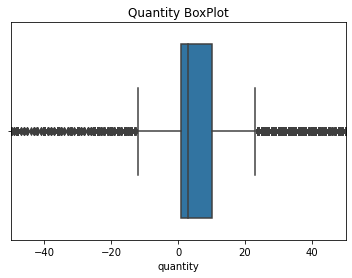

In [37]:
ax= sns.boxplot(df['quantity'])
ax.set(xlim=(-50,50))
plt.title('Quantity BoxPlot')
plt.show()

Indeed lots of outliers and negetive values

In [38]:
df[df['quantity']<0].sample(10)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid
439926,C574486,23110,parisienne key cabinet,-2,2019-11-02 12:56:00,5.75,15329.0
402442,C571499,23071,marie antoinette trinket box gold,-48,2019-10-15 15:07:00,6.50,12454.0
53568,C540841,22217,t-light holder hanging lace,-40,2019-01-09 16:14:00,1.25,15602.0
95052,C544437,M,manual,-1,2019-02-16 17:19:00,82.50,16027.0
450193,C575171,23355,hot water bottle keep calm,-1,2019-11-06 17:49:00,4.95,18164.0
516369,C579886,22163,heart string memo holder hanging,-1,2019-11-28 17:39:00,0.79,15676.0
38438,C539573,22362,glass jar peacock bath salts,-5,2018-12-18 12:19:00,2.95,14107.0
85415,C543469,21896,potting shed twine,-1,2019-02-06 14:55:00,1.85,12709.0
333482,C566197,85066,cream sweetheart mini chest,-1,2019-09-07 13:54:00,12.75,18109.0
393751,C570845,22197,popcorn holder,-3,2019-10-10 14:29:00,0.72,17017.0


It seems that all negetive quantity has an invoice with C

In [39]:
#Checking the highest value
df[df['quantity']> 8000]

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid
61619,541431,23166,medium ceramic top storage jar,74215,2019-01-16 10:01:00,1.04,12346.0
502122,578841,84826,asstd design 3d paper stickers,12540,2019-11-23 15:57:00,0.00,13256.0
540421,581483,23843,"paper craft , little birdie",80995,2019-12-07 09:15:00,2.08,16446.0


In [40]:
#Checking the lowest value
df[df['quantity']< -8000]

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid
4287,C536757,84347,rotating silver angels t-light hldr,-9360,2018-11-30 14:23:00,0.03,15838.0
61624,C541433,23166,medium ceramic top storage jar,-74215,2019-01-16 10:17:00,1.04,12346.0
225528,556687,23003,travel card wallet vintage rose,-9058,2019-06-12 10:36:00,0.00,12345
225529,556690,23005,travel card wallet i love london,-9600,2019-06-12 10:37:00,0.00,12345
225530,556691,23005,travel card wallet i love london,-9600,2019-06-12 10:37:00,0.00,12345
540422,C581484,23843,"paper craft , little birdie",-80995,2019-12-07 09:27:00,2.08,16446.0


It seems like they are the same order that cancelled minutes after. It would not help me for my product analysis so I will drop them

In [41]:
df= df.drop([540422, 540421,61619,61624], axis=0)

In [42]:
df[df['invoiceno']=='C581484']

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid


In [43]:
df[df['invoiceno']=='581483']

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid


In [44]:
#Checking the IQR upper limit
Q1_quantity= df['quantity'].quantile(0.25)
Q3_quantity= df['quantity'].quantile(0.75)
IQR_quantity= Q3_quantity - Q1_quantity
upper_limit_quantity= Q3_quantity+1.5*IQR_quantity
upper_limit_quantity

23.5

In [45]:
#Checking the IQR lower limit
lower_limit_quantity= Q1_quantity - 1.5*IQR_quantity
lower_limit_quantity

-12.5

In [46]:
quantity_outlier= df[(df['quantity']> 24) |(df['quantity']< -13) ]
quantity_outlier.shape[0]

33875

I'm Saving the outliers in a variable that I might use later on. for now I will keep the positive quantity because they are 
valuable for my analysis but for the negetive they are not helpful and I suspect them to be cancelled invoices.

In [47]:
df= df.query('quantity>0')

Now the quantity is ready for further analysis and later creating a new column with revenue

In [48]:
df['unitprice'].describe()

count    525460.000000
mean          3.876118
std          42.040101
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       13541.330000
Name: unitprice, dtype: float64

I can see a pattern which different description is many times with unit price equal to zero and customer id is '12345' (the one i created)

In [49]:
df[df['unitprice']== 0]

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid
6391,536941,22734,set of 6 ribbons vintage christmas,20,2018-12-01 12:08:00,0.0,12345
6392,536942,22139,retrospot tea set ceramic 11 pc,15,2018-12-01 12:08:00,0.0,12345
9302,537197,22841,round cake tin vintage green,1,2018-12-03 14:02:00,0.0,12647.0
14335,537534,85064,cream sweetheart letter rack,1,2018-12-05 11:48:00,0.0,12345
14336,537534,84832,zinc willie winkie candle stick,1,2018-12-05 11:48:00,0.0,12345
...,...,...,...,...,...,...,...
524622,580609,22927,green giant garden thermometer,1,2019-12-03 11:41:00,0.0,12345
535325,581202,23404,home sweet home blackboard,41,2019-12-05 18:30:00,0.0,12345
535334,581211,22142,christmas craft white fairy,14,2019-12-05 18:36:00,0.0,12345
538504,581406,46000M,polyester filler pad 45x45cm,240,2019-12-06 13:58:00,0.0,12345


In [50]:
df.drop(df[df['unitprice']== 0].index, axis=0, inplace=True)

I'm decided to drop all values equal to zero

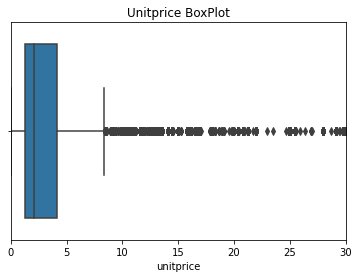

In [51]:
ax= sns.boxplot(df['unitprice'])
plt.title('Unitprice BoxPlot')
ax.set(xlim=(0,30))
plt.show()

The unit prices varies a lot

In [52]:
df[df['unitprice']==-11062.060000]

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid
299983,A563186,B,adjust bad debt,1,2019-08-10 14:51:00,-11062.06,12345
299984,A563187,B,adjust bad debt,1,2019-08-10 14:52:00,-11062.06,12345


The min value in unit price looks odd. It belong to the customer without an id and the description implies that is not a real item.

In [53]:
# I found 3 rows like this
df[df['description']=='adjust bad debt']

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid
299982,A563185,B,adjust bad debt,1,2019-08-10 14:50:00,11062.06,12345
299983,A563186,B,adjust bad debt,1,2019-08-10 14:51:00,-11062.06,12345
299984,A563187,B,adjust bad debt,1,2019-08-10 14:52:00,-11062.06,12345


In [54]:
#Checking the price outliers
df[df['unitprice']>8]

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid
16,536367,22622,box of vintage alphabet blocks,2,2018-11-29 08:34:00,9.95,13047.0
45,536370,POST,postage,3,2018-11-29 08:45:00,18.00,12583.0
65,536374,21258,victorian sewing box large,32,2018-11-29 09:09:00,10.95,15100.0
151,536382,22839,3 tier cake tin green and cream,2,2018-11-29 09:45:00,14.95,16098.0
152,536382,22838,3 tier cake tin red and cream,2,2018-11-29 09:45:00,14.95,16098.0
...,...,...,...,...,...,...,...
541768,581578,POST,postage,3,2019-12-07 12:16:00,18.00,12713.0
541786,581578,22622,box of vintage alphabet blocks,6,2019-12-07 12:16:00,11.95,12713.0
541831,581579,22941,christmas lights 10 reindeer,4,2019-12-07 12:19:00,8.50,17581.0
541849,581580,22894,tablecloth red apples design,2,2019-12-07 12:20:00,9.95,12748.0


In [55]:
#Checking what kind of product above 8
df.query('unitprice>8').groupby('description')['unitprice'].nunique().reset_index().sort_values(
    by='unitprice', ascending=False).head(15)

,description,unitprice
243,dotcom postage,680
450,manual,89
559,postage,29
781,vintage union jack bunting,8
161,chilli lights,7
117,cabin bag vintage paisley,7
518,party bunting,7
596,regency cakestand 3 tier,7
261,enamel bread bin cream,7
14,3 tier cake tin red and cream,7


I can notice not products marked as product and they are not valueable for my analysis

In [56]:
not_product= [
    'dotcom postage',
    'manual','discount',
    'postage','samples',
    'amazon fee','bank charges','cruk commission','adjust bad debt']

In [57]:
#filtering out those not real item
df= df.query('description != @not_product')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 522710 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoiceno    522710 non-null  object        
 1   stockcode    522710 non-null  object        
 2   description  522710 non-null  object        
 3   quantity     522710 non-null  int64         
 4   invoicedate  522710 non-null  datetime64[ns]
 5   unitprice    522710 non-null  float64       
 6   customerid   522710 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 31.9+ MB


In [58]:
df['unitprice'].describe()

count    522710.000000
mean          3.287627
std           4.464499
min           0.001000
25%           1.250000
50%           2.080000
75%           4.130000
max         649.500000
Name: unitprice, dtype: float64

## Conclusion

1. Quantitve columns are ready for analysis
2. I found the outliers and decided to keep them because they are valuable information for product range analysis
3. I dropped all rows with 'not real items'
4. I dropped all negetive quantity values because they related to cancelled invoices 

# Step 4. Categorizing products

In [59]:
df['description'].value_counts()

white hanging heart t-light holder     2320
jumbo bag red retrospot                2109
regency cakestand 3 tier               2007
party bunting                          1699
lunch bag red retrospot                1582
                                       ... 
blue painted kashmiri chair               1
set/4 2 tone egg shape mixing bowls       1
pink cherry blossom cup & saucer          1
blackchristmas tree 30cm                  1
letter "u" bling key ring                 1
Name: description, Length: 3788, dtype: int64

In [60]:
m=Mystem()

In [61]:
#Calculating the frequency of words in the column
a = df['description'].str.lower().str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)
print (word_dist)

<FreqDist with 2252 samples and 2318516 outcomes>


In [62]:
#function for lemmatization of text 
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [63]:
#applying the method on description and creating a new column
df['lemma']= df['description'].apply(lemmatize_text)

In [64]:
#set to 800 most frequently words
rslt = pd.DataFrame(word_dist.most_common(800),
                    columns=['Word', 'Frequency'])
rslt.head()

,Word,Frequency
0,set,52550
1,of,52067
2,bag,50823
3,red,41754
4,heart,38279


In [65]:
#helping me to manually select keywords 
rslt_list= rslt['Word'].tolist()
rslt_list

['set',
 'of',
 'bag',
 'red',
 'heart',
 'vintage',
 'retrospot',
 'design',
 'pink',
 'christmas',
 'box',
 'jumbo',
 'metal',
 'cake',
 'white',
 'blue',
 'lunch',
 '3',
 'sign',
 'hanging',
 'holder',
 'pack',
 't-light',
 'paper',
 'card',
 'small',
 '6',
 'decoration',
 'wooden',
 'polkadot',
 'tea',
 'glass',
 'cases',
 'bottle',
 '12',
 'in',
 'spaceboy',
 'and',
 'hot',
 'water',
 'with',
 'large',
 'pantry',
 'home',
 'tin',
 'rose',
 'paisley',
 'green',
 '4',
 'ceramic',
 'regency',
 'doormat',
 'dolly',
 'mini',
 'ivory',
 'mug',
 'bunting',
 'love',
 'cream',
 'girl',
 'party',
 "'s",
 'assorted',
 'clock',
 'feltcraft',
 'black',
 'wicker',
 'bowl',
 'kit',
 'garden',
 'woodland',
 'wrap',
 'tins',
 'fairy',
 'frame',
 'childrens',
 'charlotte',
 'colour',
 'birthday',
 'silver',
 'antique',
 'wall',
 'star',
 'drawer',
 'strawberry',
 'wood',
 '60',
 'bird',
 'zinc',
 'skull',
 ',',
 'union',
 'doily',
 'gift',
 'cutlery',
 '50',
 'flower',
 'suki',
 '2',
 'candles',
 '

In [66]:
#setting up the categories
christmas=['christmas','tree','gingham','ribbon','santa','reindeer ']
fashion_accessories=['suki','umbrella','wallet','hat','lipstick','necklace','earrings','gloves','bracelet','coat',
                    'tissues','polkadot','fob','washbag','warmer','ring','retrospot']
vintage=['vintage','antique','retro']
kitchen=['cake','lunch','bottle','tea','kitchen','strawberry','egg','jar',
        'jam','chocolate','bakelike','baking','plate','cookie','pot','apron','teacup','sweet','food','cook',
        'wine','recipe','pan','frying','fork','popcorn','cafe','sugar','coaster','spoon','spoons',
        'pantry','mug','coffee','cupcake','herb','cakestand','fruit','cutlery','fridge','cheese','tray,'
        ]
party_birthday=['card','candle','party','gift','birthday','napkins','love','heart'
               ]
home_decor=['t-lights','home','knob','door','lantern','bulb','mirror','t-light','shelf','frame','photo','doormat','folkart'
           'hanger','sign','table','doorstop','cushion','ceramic','bedroom','wicker','chair','regency', 'board','light',
            'wooden','cabinet','drawerknob'
           ]
children=['girl','kids','toys','dolly','childrens','babushka','dog','rabbit','robot','toy','magic','circus',
          'dinosaur','treasure','marbles','feltcraft','game','balloons','balloon','skittles','harmonica','stickers',
          'glitter','jigsaw','butterflies','butterfly','magnets','soldiers','bunny','school','soldier','bingo','rope',
          'helicopter','animals','skulls','stickers','cat','ducks','baby','delphinium','bell','books',' swirly marbles'
         ]
garden=['garden','grow','picnic','parasol','botanical','torch']
electronics=['alarm','electronic','meter','radio','mobile','clock','calculator']
office=['pencils','office','pen','crayon','chalkboard','craft','memo','notebook','sketchbook','pad','chalk','paper',
       'erasers','letters','clay','tube','colouring pencils']
travel=['travel','sewing','luggage','passport','holiday']
tools=['screwdriver','repair','aid','kit','repair kit','shoe shine box']



In [67]:
#Setting up the categories using a function

def lemma_function(line):
 
   
    if any(word in line for word in christmas):
        return 'christmas'
    elif any(word in line for word in fashion_accessories):
        return 'fashion_accessories'
    elif any(word in line for word in vintage):
        return 'vintage'
    elif any(word in line for word in kitchen):
        return 'kitchen'
    elif any(word in line for word in party_birthday):
        return 'party_birthday'
    elif any(word in line for word in home_decor):
        return 'home_decor'
    elif any(word in line for word in children):
        return 'children'
    elif any(word in line for word in garden):
        return 'garden'
    elif any(word in line for word in electronics):
        return 'electronics'
    elif any(word in line for word in office):
        return 'office'
    elif any(word in line for word in travel):
        return 'travel'
    else:
        return 'other'

In [68]:
# Applying the function from lemma column 
df['category']= df['lemma'].apply(lemma_function)

In [69]:
# number of items in every category
df['category'].value_counts()

kitchen                118579
other                   84308
home_decor              65208
fashion_accessories     65123
party_birthday          57455
vintage                 35258
christmas               35173
children                32511
office                  15604
garden                   7332
travel                   3637
electronics              2522
Name: category, dtype: int64

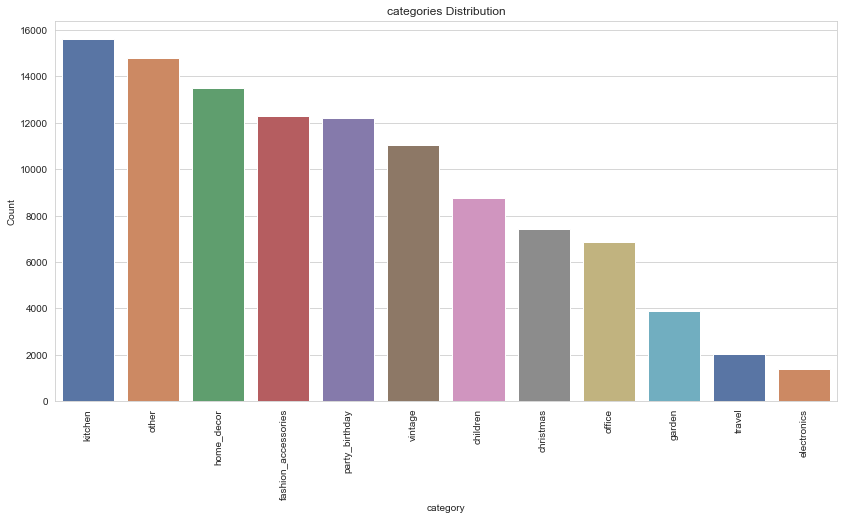

In [70]:
category= df.groupby('category')['invoiceno'].nunique().reset_index().sort_values(by='invoiceno', ascending=False)

plt.figure(figsize=(14,7))
sns.set_style('whitegrid')
sns.barplot(x='category', y='invoiceno', data=category ,palette='deep')
plt.title('categories Distribution')
plt.xticks(rotation=90)
plt.ylabel('Count')
sns.set_context('talk', font_scale=1)
plt.show()

## Conclusion
1. I sorted the items into 12 categories.
2. Kitchen category is the most popular, after that there is other, home decoration, fashion and on 5th palce party birthday category.


# Step 5. RFM analysis

In [71]:
df['invoicedate'].describe()

count                  522710
unique                  18333
top       2019-10-29 14:41:00
freq                     1113
first     2018-11-29 08:26:00
last      2019-12-07 12:50:00
Name: invoicedate, dtype: object

In [72]:
#Creating new column of revenue per item for each invoice
df['revenue']= df['quantity'] * df['unitprice']
df.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,lemma,category,revenue
0,536365,85123A,white hanging heart t-light holder,6,2018-11-29 08:26:00,2.55,17850.0,"[white, hanging, heart, t-light, holder]",party_birthday,15.30
1,536365,71053,white metal lantern,6,2018-11-29 08:26:00,3.39,17850.0,"[white, metal, lantern]",home_decor,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2018-11-29 08:26:00,2.75,17850.0,"[cream, cupid, heart, coat, hanger]",fashion_accessories,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2018-11-29 08:26:00,3.39,17850.0,"[knitted, union, flag, hot, water, bottle]",kitchen,20.34
4,536365,84029E,red woolly hottie white heart.,6,2018-11-29 08:26:00,3.39,17850.0,"[red, woolly, hottie, white, heart.]",other,20.34


In [73]:
#number of invoices(transaction)
df['invoiceno'].nunique()

19774

In [74]:
#amount of total revenue 
df['revenue'].sum()

10009302.932999998

In [75]:
#average revenue per invoice
df.groupby('invoiceno')['revenue'].sum().median()

302.32

In [76]:
#creating a date column with only year and month
df['date']= df['invoicedate'].dt.strftime('%Y/%m')

In [77]:
# excluding the one I created
date_rev=df.query('customerid!="12345"').groupby('date')['revenue'].sum().reset_index()
date_rev

,date,revenue
0,2018/11,93249.860
1,2018/12,472499.700
2,2019/01,528772.160
3,2019/02,440108.970
4,2019/03,567129.920
5,2019/04,437680.691
6,2019/05,696192.730
7,2019/06,622528.010
8,2019/07,619510.521
9,2019/08,662247.640


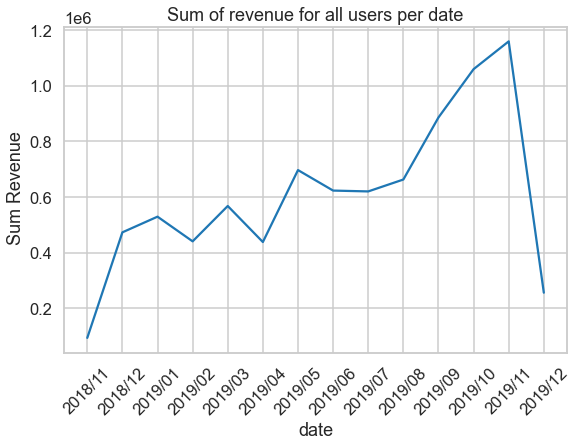

In [78]:
plt.figure(figsize=(9,6))
fig= sns.lineplot(data= date_rev, x='date', y='revenue')
plt.title('Sum of revenue for all users per date')
plt.ylabel(' Sum Revenue')
plt.xticks(rotation=45)
plt.show()

We can see a trend going up from November 2018 and then a high peak since August 2019 and then a big fall.


In [79]:
#settenig the date for the last day 2019 
now= dt.datetime(2019,12,31)
now

datetime.datetime(2019, 12, 31, 0, 0)

In [80]:
#grouping by customer id the recency, frequency and monetary
rfm=df.groupby('customerid').agg({
    'invoicedate': lambda x: (now-x.max()).days,
    'invoiceno': 'count',
    'revenue':'sum'
}).reset_index()

In [81]:
rfm[rfm['customerid']== '12345']

,customerid,invoicedate,invoiceno,revenue
4333,12345,23,131426,1511042.49


In [82]:
#excluding the 'fake customer'
rfm= rfm.query('customerid != "12345"')

In [83]:
rfm.rename(columns={'invoicedate':'recency',
                    'invoiceno':'frequency',
                   'revenue':'monetary_value'},inplace=True)

In [84]:

rfm.head(10)

,customerid,recency,frequency,monetary_value
0,12347.0,25,182,4310.00
1,12348.0,98,27,1437.24
2,12349.0,41,72,1457.55
3,12350.0,333,16,294.40
4,12352.0,59,77,1385.74
5,12353.0,227,4,89.00
6,12354.0,255,58,1079.40
7,12355.0,237,13,459.40
8,12356.0,45,58,2487.43
9,12357.0,56,131,6207.67


We can notice the unique customer id, how much days passed since his last order, how many times he ordered, and the total money 
he spent.

Now I need to find out if the segments are normally distributed or not. According to that I will know how many clusters to create

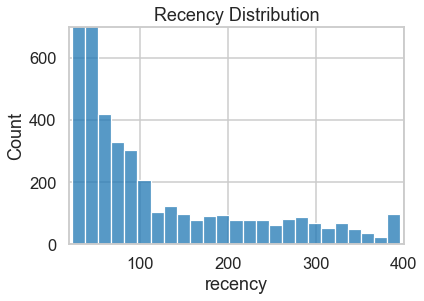

In [85]:
ax=sns.histplot(data=rfm, x='recency')
ax.set_ylim(0, 700)
ax.set_xlim(20,400)
plt.title('Recency Distribution')
plt.show()

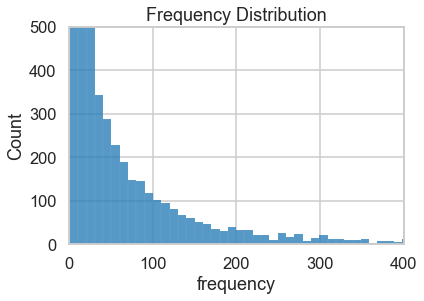

In [86]:
ax= sns.histplot(data=rfm, x='frequency')
ax.set_ylim(0, 500)
ax.set_xlim(0,400)
plt.title('Frequency Distribution')
plt.show()

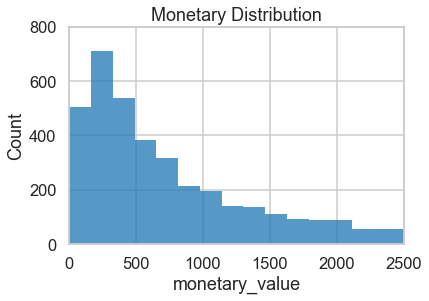

In [87]:
ax=sns.histplot(data=rfm, x='monetary_value')
ax.set_ylim(0, 800)
ax.set_xlim(0,2500)
plt.title('Monetary Distribution')
plt.show()

We can see that all three segments are not normally distributed so I need to apply Kmeans method to decide how to split the segments 

In [88]:
#Creating a function that will train the data and output the number of clusters for each segments
def cluster_solution(parameter):
    score={}
    for n_cluster in [2,3,4,5,6]:
        kmeans = KMeans(n_clusters=n_cluster).fit(
            rfm[[parameter]])
    
        silhouette_avg = silhouette_score(
            rfm[[parameter]], 
            kmeans.labels_)
        score[n_cluster]=silhouette_avg
    needed_number=max(score,key=score.get)
    return needed_number

In [89]:
for i in rfm[['recency','frequency','monetary_value']].columns:
    print(i, cluster_solution(i))

recency 2
frequency 2
monetary_value 2


I will split each segments to 2 parts

In [90]:
#divide the recency into 2 but reverse the score so 2 is for short recency
r_labels=range(2,0,-1)
rfm['R']=pd.qcut(rfm.recency,q=2,labels=r_labels)

In [91]:
f_labels=range(1,3)
rfm['F']=pd.qcut(rfm.frequency,q=2,labels=f_labels)
m_labels=range(1,3) 
rfm['M']= pd.qcut(rfm.monetary_value,q=2,labels=m_labels)

In [92]:
rfm['R'].unique()

[2, 1]
Categories (2, int64): [2 < 1]

In [93]:
#summing up the results 
rfm['RFM_segment']=rfm['R'].astype(int)+rfm['F'].astype(int)+rfm['M'].astype(int)

In [94]:
rfm

,customerid,recency,frequency,monetary_value,R,F,M,RFM_segment
0,12347.0,25,182,4310.00,2,2,2,6
1,12348.0,98,27,1437.24,1,1,2,4
2,12349.0,41,72,1457.55,2,2,2,6
3,12350.0,333,16,294.40,1,1,1,3
4,12352.0,59,77,1385.74,2,2,2,6
...,...,...,...,...,...,...,...,...
4328,18280.0,300,10,180.60,1,1,1,3
4329,18281.0,203,7,80.82,1,1,1,3
4330,18282.0,30,12,178.05,2,1,1,4
4331,18283.0,26,719,2039.58,2,2,2,6


In [95]:
rfm['RFM_segment'].unique()

array([6, 4, 3, 5])

I decided since each segments splitted into two parts and not four to use the method of scoring RFM rather then combination of segments (i.e 111, 444, 122 ect.).

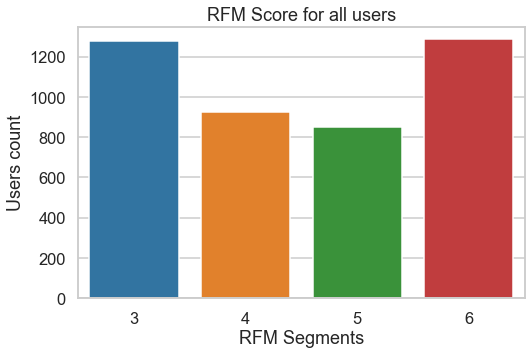

In [96]:
rfm_dist= rfm.groupby('RFM_segment')['customerid'].count(
).reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data= rfm_dist, x='RFM_segment', y='customerid')
plt.title('RFM Score for all users')
plt.xlabel('RFM Segments')
plt.ylabel('Users count')
plt.show()

We can notice that most users are in both ends of the scoring system

In [97]:
#creating a function which labeling the users by their rfm score
def rfm_score(x):
    if x== 6:
        return 'Whipped cream'
    elif x == 5:
        return 'Loyal'
    elif x== 4:
        return 'Needs Attention'
    else:
        return 'Lost customer'
   

Whipped cream- users who spent the most, buys frequently and bought recently
Loyal- users that are big spenders and/or buys frequently and/or buys recently. 
Need attention- users that we are starting to loose because they are excellent only in one segment and in the two others they preforming bad.
Lost customer- bad in all segments. We don't need to invest energy to bring them back.

In [98]:
rfm['customer_category']= rfm['RFM_segment'].apply(rfm_score)

In [99]:
rfm_sort= rfm[['customerid','customer_category']]

In [100]:
#mergin back to our main dataframe
df=df.merge(rfm_sort, how='left', on='customerid')

In [101]:
df.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,lemma,category,revenue,date,customer_category
0,536365,85123A,white hanging heart t-light holder,6,2018-11-29 08:26:00,2.55,17850.0,"[white, hanging, heart, t-light, holder]",party_birthday,15.30,2018/11,Loyal
1,536365,71053,white metal lantern,6,2018-11-29 08:26:00,3.39,17850.0,"[white, metal, lantern]",home_decor,20.34,2018/11,Loyal
2,536365,84406B,cream cupid hearts coat hanger,8,2018-11-29 08:26:00,2.75,17850.0,"[cream, cupid, heart, coat, hanger]",fashion_accessories,22.00,2018/11,Loyal
3,536365,84029G,knitted union flag hot water bottle,6,2018-11-29 08:26:00,3.39,17850.0,"[knitted, union, flag, hot, water, bottle]",kitchen,20.34,2018/11,Loyal
4,536365,84029E,red woolly hottie white heart.,6,2018-11-29 08:26:00,3.39,17850.0,"[red, woolly, hottie, white, heart.]",other,20.34,2018/11,Loyal


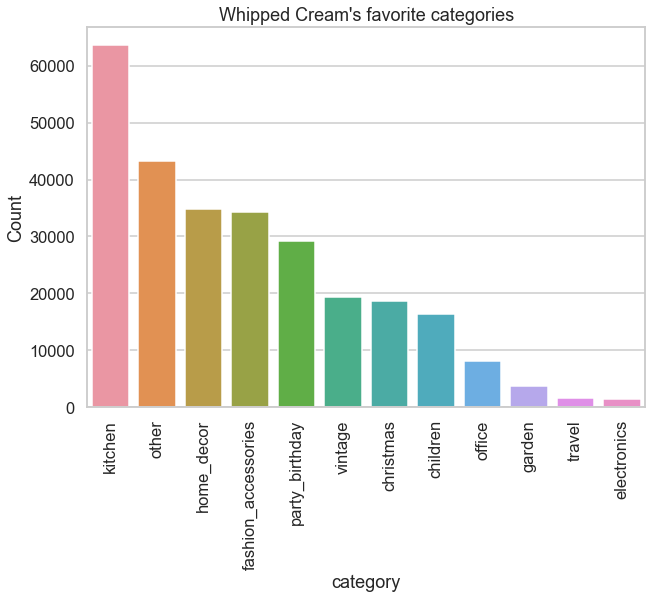

In [102]:
whipped_category= df.query('customer_category=="Whipped cream"').groupby('category')['stockcode'].count().reset_index().sort_values(
by='stockcode', ascending=False)
plt.figure(figsize=(10,7))
sns.barplot(data=whipped_category, x='category',y='stockcode')
plt.title("Whipped Cream's favorite categories")
plt.xticks(rotation=90)
plt.ylabel('Count')
sns.set_context('talk', font_scale=1)
plt.show()

The bar plot above doesn't seem to change much compare to the overall users.

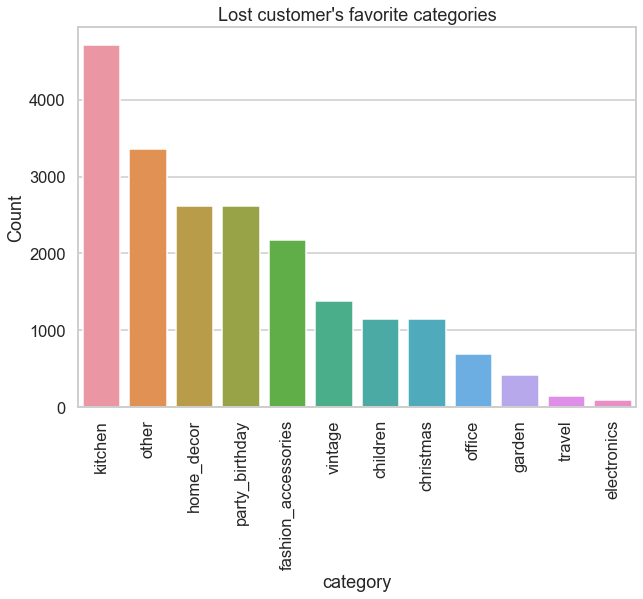

In [103]:
lost_category= df.query('customer_category=="Lost customer"').groupby('category')['stockcode'].count().reset_index().sort_values(
by='stockcode', ascending=False)
plt.figure(figsize=(10,7))
sns.barplot(data=lost_category, x='category',y='stockcode')
plt.title("Lost customer's favorite categories")
plt.xticks(rotation=90)
plt.ylabel('Count')
sns.set_context('talk', font_scale=1)
plt.show()

Same as for lost customers

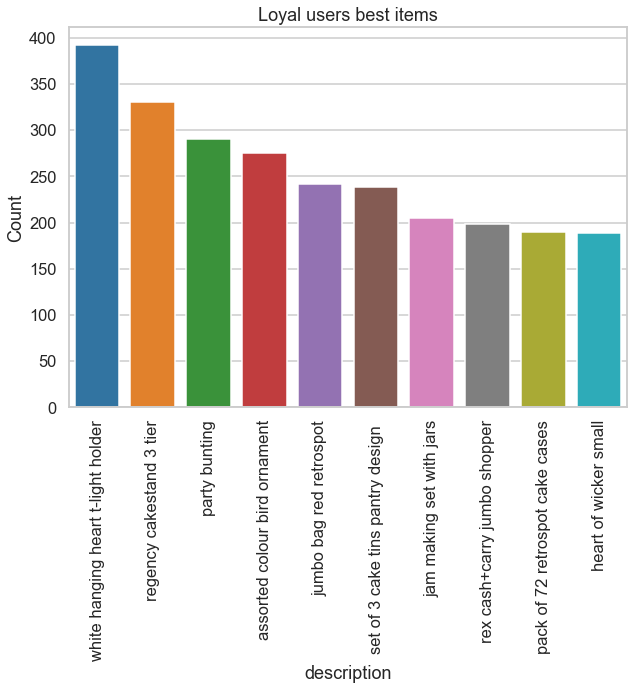

In [104]:
loyal_item= df.query('customer_category=="Loyal"').groupby('description')['stockcode'].count().reset_index().sort_values(
by='stockcode', ascending=False).head(10)
plt.figure(figsize=(10,7))
sns.barplot(data=loyal_item, x='description',y='stockcode')
plt.title('Loyal users best items')
plt.xticks(rotation=90)
plt.ylabel('Count')
sns.set_context('talk', font_scale=0.8)
plt.show()


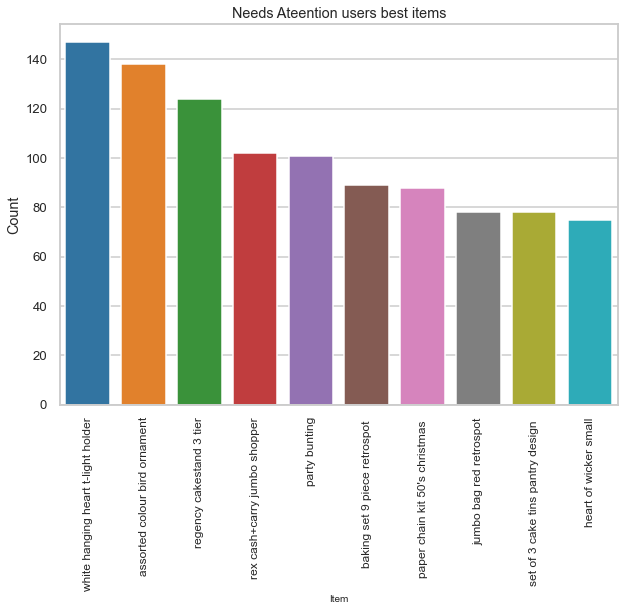

In [105]:
lost_item= df.query('customer_category=="Needs Attention"').groupby('description')['stockcode'].count().reset_index().sort_values(
by='stockcode', ascending=False).head(10)
plt.figure(figsize=(10,7))
sns.barplot(data=lost_item, x='description',y='stockcode')
plt.title('Needs Ateention users best items')
plt.xticks(rotation=90, size=12)
plt.ylabel('Count')
plt.xlabel('Item',size=10)
sns.set_context('talk', font_scale=0.7)
plt.show()

We can see that different types of users buys has different best sellers items

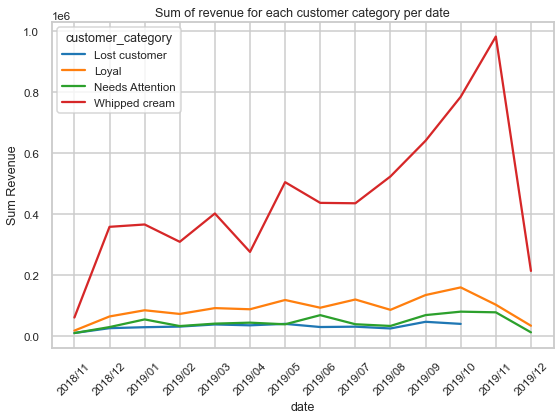

In [106]:

plt.figure(figsize=(9,6))
fig= sns.lineplot(data= df.groupby(['customer_category','date'])['revenue'].sum().reset_index(), x='date', y='revenue',hue='customer_category')
plt.title('Sum of revenue for each customer category per date')
plt.ylabel('Sum Revenue')
plt.xticks(rotation=45)
plt.show()

We can see clearly that whipped cream users follows the general trend we saw earlier while the others showing bad performance in revenue

## Conclusion

We need to focus how to make the loyal users become whipped cream users by incentives, also we need to convert the 'Needs attention users to loyals users. There is too many lost users in out dataset and we need to further investigae why is that, prehaps the product range is too small or we don't focus enough on ad campigns to draw them back on.

# Step 6. Product Analysis & Basket Analysis

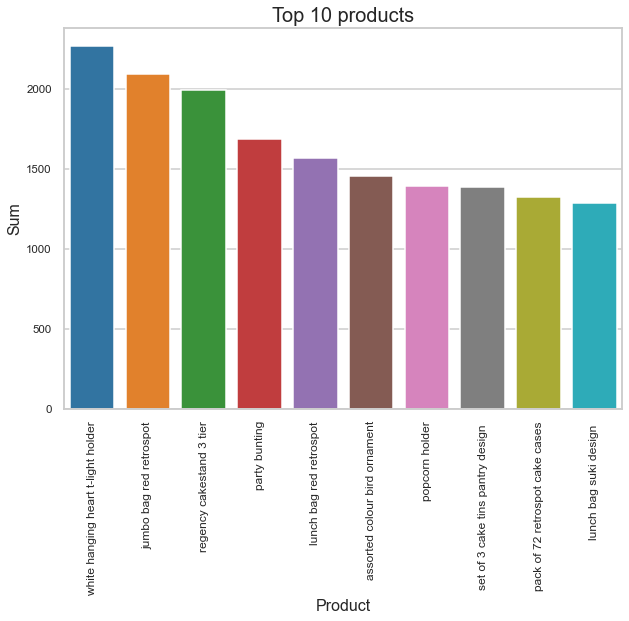

In [107]:
best_seller= df.groupby('description')['invoiceno'].nunique().reset_index(
).sort_values(by='invoiceno', ascending=False).head(10)
plt.figure(figsize=(10,7))
sns.barplot(x='description', y='invoiceno', 
            data= best_seller)
plt.xticks(rotation=90, fontsize=12)
plt.xlabel('Product', size=16)
plt.ylabel('Sum', size=16)
plt.title('Top 10 products', size=20)
plt.show()

These is the top 10 products: first is 'White hanging heart t-light holder', second is 'Jumbo bag red retrospot' and third is 
'regency cakestand 3 tier'

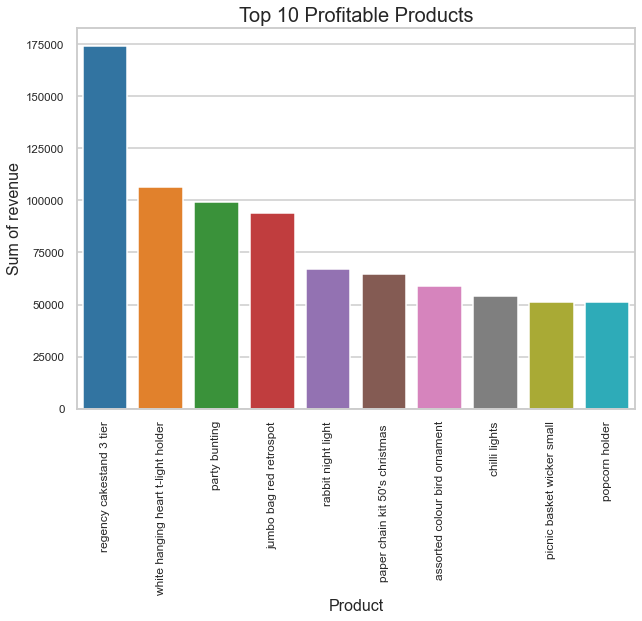

In [108]:
best_profit= df.groupby('description')['revenue'].sum().reset_index(
).sort_values(by='revenue', ascending=False).head(10)
plt.figure(figsize=(10,7))
sns.barplot(x='description', y='revenue', 
            data= best_profit)
plt.xticks(rotation=90, fontsize=12)
plt.xlabel('Product', size=16)
plt.ylabel('Sum of revenue', size=16)
plt.title('Top 10 Profitable Products', size=20)
plt.show()

When we look at the most profitable products we see that there is a difference from the previous bar plot. Here the first product is 'regency cakestand', then 'White t-light', then 'Party bunting' and only in forth place 'Jumbo bag'.

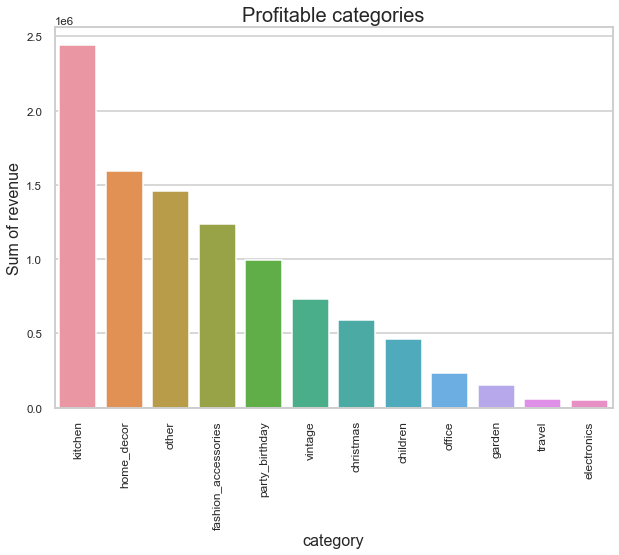

In [109]:
category_profit= df.groupby('category')['revenue'].sum().reset_index(
).sort_values(by='revenue', ascending=False)
plt.figure(figsize=(10,7))
sns.barplot(x='category', y='revenue', 
            data= category_profit)
plt.xticks(rotation=90, fontsize=12)
plt.xlabel('category', size=16)
plt.ylabel('Sum of revenue', size=16)
plt.title('Profitable categories', size=20)
plt.show()

kitchen is the most profitable category by far from the rest of categories

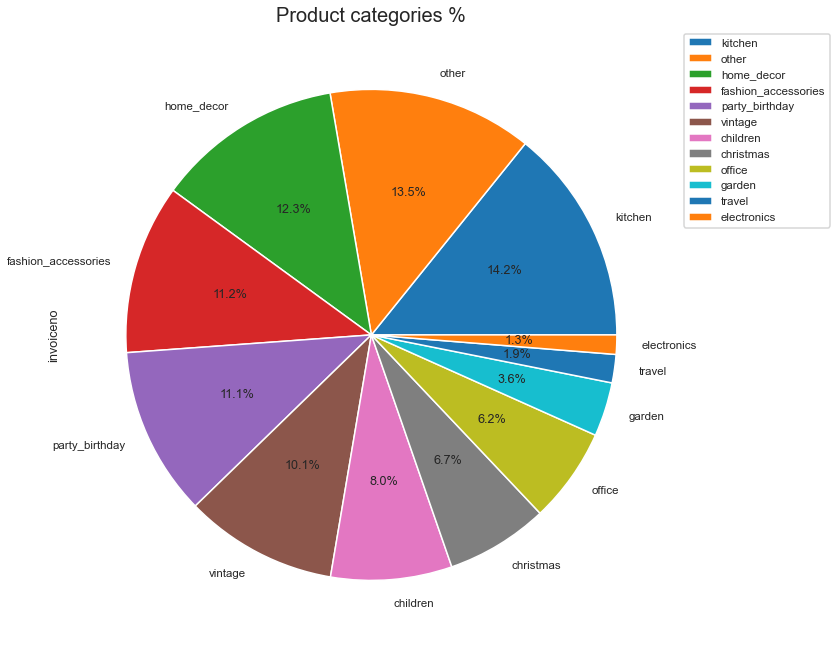

In [110]:
category_pie= df.groupby('category')['invoiceno'].nunique().reset_index().sort_values(by='invoiceno', 
            ascending=False).set_index('category')
category_pie.plot(y='invoiceno', kind='pie', figsize=(11,12), autopct='%1.1f%%')
plt.title('Product categories %', size=20)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
plt.show()

Kitchen category has the largest orders share of 14.2%, then other with 13.5%, home decor with 12.3% and fashion and party share almost the same with 11%. The lowest share is travel and electronic with less the 2%.

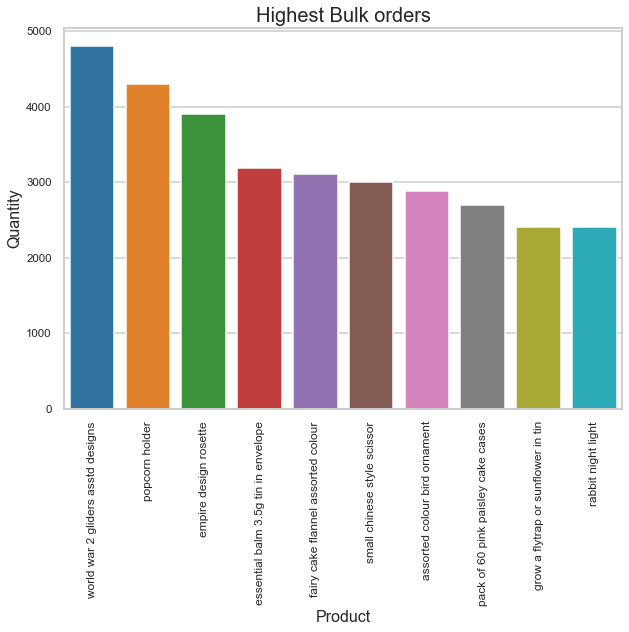

In [111]:
bulk_product= df.groupby(['description'])['quantity'].max().reset_index().sort_values(
    by='quantity', ascending=False).head(10)
plt.figure(figsize=(10,7))
sns.barplot(x='description', y='quantity', 
            data= bulk_product, ci=None)
plt.xticks(rotation=90, fontsize=12)
plt.xlabel('Product', size=16)
plt.ylabel('Quantity', size=16)
plt.title('Highest Bulk orders', size=20)
plt.show()

Products that ordered the most in terms of quantity is 'World war 2 gliders',second 'popcorn holder', third 'Empire design rosette'

### Basket Analysis

In [112]:
df['invoiceno']= df['invoiceno'].astype('str')

In [113]:
#Grouping by invoice and counting the products. I'm choosing only 3 leading categories because my kernel will die if I run the
#analysis on the entire data
purchases = df.query('(category == "kitchen") | (category=="home_decor") |(category=="other")').groupby(
    ['invoiceno', 'description'])['description'].count().reset_index(name ='count')
purchases

,invoiceno,description,count
0,536365,glass star frosted t-light holder,1
1,536365,knitted union flag hot water bottle,1
2,536365,red woolly hottie white heart.,1
3,536365,white metal lantern,1
4,536367,assorted colour bird ornament,1
...,...,...,...
265458,581587,childrens cutlery spaceboy,1
265459,581587,circus parade lunch box,1
265460,581587,pack of 20 spaceboy napkins,1
265461,581587,plasters in tin strongman,1


In [114]:
#creating a basket by pivoting the products into columns and invoice to index. the values are products count
basket= purchases.groupby(['invoiceno','description'])['count'].sum().unstack().reset_index().fillna(0).set_index('invoiceno')
basket

description,oval wall mirror diamante,set 2 tea towels i love london,*boombox ipod classic,*usb office mirror ball,12 daisy pegs in wood box,12 egg house painted wood,12 hanging eggs hand painted,12 ivory rose peg place settings,12 pink hen+chicks in basket,12 pink rose peg place settings,...,zinc finish 15cm planter pots,zinc hearts plant pot holder,zinc herb garden container,zinc sweetheart soap dish,zinc sweetheart wire letter rack,zinc t-light holder star large,zinc t-light holder stars small,zinc top 2 door wooden shelf,zinc wire kitchen organiser,zinc wire sweetheart letter tray
invoiceno,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536370,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [115]:
#if there is a product returns 1 
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

In [116]:
#applying the apriori. the min support is 1% so I can't get paired items together
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)

In [117]:
basket_sets

description,oval wall mirror diamante,set 2 tea towels i love london,*boombox ipod classic,*usb office mirror ball,12 daisy pegs in wood box,12 egg house painted wood,12 hanging eggs hand painted,12 ivory rose peg place settings,12 pink hen+chicks in basket,12 pink rose peg place settings,...,zinc finish 15cm planter pots,zinc hearts plant pot holder,zinc herb garden container,zinc sweetheart soap dish,zinc sweetheart wire letter rack,zinc t-light holder star large,zinc t-light holder stars small,zinc top 2 door wooden shelf,zinc wire kitchen organiser,zinc wire sweetheart letter tray
invoiceno,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536370,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581585,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [118]:
frequent_itemsets.sort_values(by='support',ascending=False)


,support,itemsets
301,0.106733,(regency cakestand 3 tier)
19,0.078117,(assorted colour bird ornament)
277,0.074734,(popcorn holder)
336,0.074358,(set of 3 cake tins pantry design )
206,0.068345,(lunch bag black skull.)
...,...,...
128,0.010040,(french toilet sign blue metal)
685,0.010040,"(pack of 60 spaceboy cake cases, pack of 60 pi..."
694,0.010040,"(regency tea plate pink, pink regency teacup a..."
46,0.010040,(ceramic cake design spotted mug)


We can see the top support products that appears in a basket: regency cakestand 3 tier with 10%, assorted colour bird ornament with 7%, popcorn holder with 7% and lunch bag black skull with 6%. 

Now lets see how is the support and lift for the paired items

In [119]:
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)
rules.sort_values('confidence', ascending = False, inplace = True)

In [120]:
rules.sample(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
451,(regency cakestand 3 tier),(lunch bag cars blue),0.106733,0.061742,0.011865,0.111167,1.800519,0.005275,1.055607
306,(jumbo bag scandinavian blue paisley),(jumbo bag alphabet),0.043273,0.048642,0.010738,0.248139,5.101364,0.008633,1.265338
364,(jumbo bag woodland animals),(jumbo bag spaceboy design),0.046333,0.036830,0.015677,0.338355,9.186869,0.013971,1.455719
127,(dolly girl lunch box),(lunch bag dolly girl design),0.045635,0.036615,0.010040,0.220000,6.008387,0.008369,1.235108
910,"(lunch bag black skull., strawberry charlotte...",(woodland charlotte bag),0.015086,0.044722,0.010254,0.679715,15.198532,0.009580,2.982589
552,(popcorn holder),(strawberry charlotte bag),0.074734,0.038763,0.012026,0.160920,4.151368,0.009129,1.145584
83,(blue stripe ceramic drawer knob),(red stripe ceramic drawer knob),0.022818,0.023462,0.013422,0.588235,25.072015,0.012887,2.371593
82,(red stripe ceramic drawer knob),(blue stripe ceramic drawer knob),0.023462,0.022818,0.013422,0.572082,25.072015,0.012887,2.283576
50,(alarm clock bakelike red ),(alarm clock bakelike ivory),0.056427,0.030602,0.020026,0.354900,11.597139,0.018299,1.502709
979,(roses regency teacup and saucer ),"(regency tea plate green , regency tea plate r...",0.057178,0.017127,0.011113,0.194366,11.348792,0.010134,1.220000


If we look at the table of association rules we want to find the products that bought together have a high support which means that they are popular. A lift above 1 which indicates a high link between them and make a perfect up-sale. And high confidence which indicates the probablity to buy them together.
We can see that:
1. herb marker mint/thyme paired with herb marker rosemary has a support of 0.01, confidence of 95% and high lift.
2. The same with herb marker parsley/thyme and rosemary, herb marker basil/thyme and rosemary.
3. Regency tea plate roses with regency tea plate green. support of 0.013, confidence of 94% and lift of 46.
4. lunch bag black skull with lunch bag dolly girl design. support of 0.01, confidence of 23% and lift of 6.
5. hand over the chocolate sign with gin + tonic diet metal sign. support of 0.01, confidence of 43% and lift of 9.96
6. hot water bottle tea and sympathy with scottie dog hot water bottle. support of 0.01, confidence of 30% and lift of 7.4
7. jumbo storage bag skulls with jumbo bag woodland animals. support of 0.01, confidence of 395 and lift of 8.5


In [121]:
#Let's build a correlation and try to figure out if categories correlate with each other
df_pivot= df.pivot_table(index='invoiceno', columns='category', values='quantity', aggfunc='sum').fillna(0)


In [122]:
#if there is a product returns 1 
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

cat_pivot = df_pivot.applymap(encode_units)

In [123]:
#pivot of categories and invoices. The values are represnting if there is and order (1) or not (0)
cat_pivot

category,children,christmas,electronics,fashion_accessories,garden,home_decor,kitchen,office,other,party_birthday,travel,vintage
invoiceno,,,,,,,,,,,,
536365,1,0,0,1,0,1,1,0,1,1,0,0
536366,0,0,0,1,0,0,0,0,0,0,0,0
536367,1,0,0,0,0,1,1,0,1,1,0,1
536368,0,0,0,1,0,0,1,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
581583,0,0,0,1,0,0,1,0,0,0,0,0
581584,0,0,0,0,0,0,1,0,0,1,0,0
581585,0,0,0,0,1,1,1,0,1,1,0,1


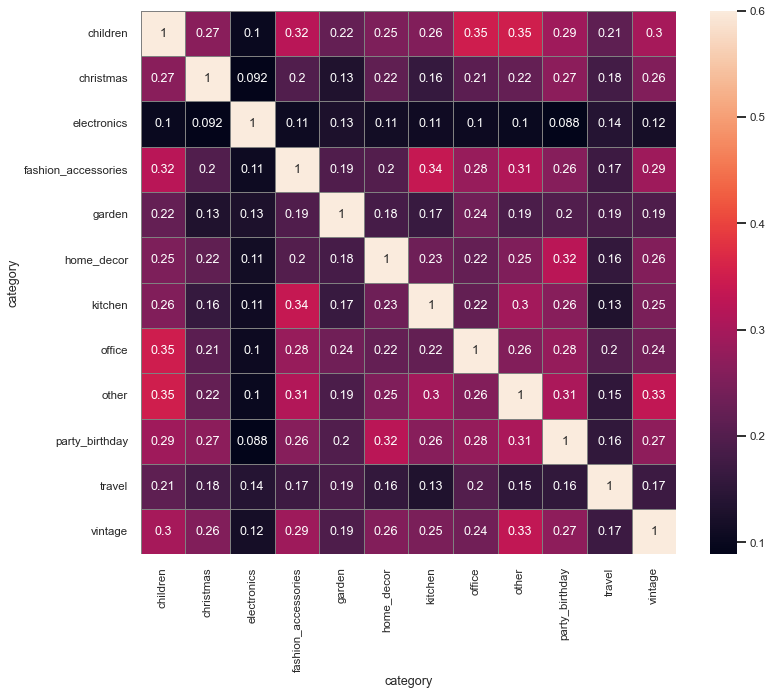

In [124]:
plt.figure(figsize=(12,10))
sns.heatmap(data=cat_pivot.corr() ,annot=True, linewidths=1, linecolor='gray', vmax = 0.6)
plt.show()

It is clearly that there isn't a strong correlation between the categories in the same order (invoice no) but there is a link between them:

1. Children with office and other (0.35)
2. Kitchen with fashion (0.34)
3. vintage with other (0.33)
4. Home decoration with party & birthday (0.32)

## Conclusion

1. Top product is 'White hanging heart t-light holder'.
2. Top profitable product is 'regency cakestand'.
3. Kitchen is the most profitable category.
4. Share of categories: Kitchen 14.2%, Other 13.5%, Home decor 12.3%. Three categories has a share of more then a third from      overall categories.
5. 'World war 2 gliders' is the product that ordered in the largest amount.
6. Regency cakestand 3 tier with 10% support and assorted colour bird ornament with 7% support (from kitchen, other and            home_decor categories).
7. Recommended upsales: herb markers with any kind with another herb markers, Regency tea plate roses with regency tea plate      green, lunch bag black skull with lunch bag dolly girl design, hand over the chocolate sign with gin+tonic diet metal sign,    hot water bottle tea and sympathy with scottie dog hot water bottle and jumbo storage bag skulls with jumbo bag woodland        animals.
8. We can conclude from above that users tend to buy products that are the same kind.
9. There is some correlation between children and office, kitchen and fashion, vintage and other, home decor and party.

# Step 7. Hypotheses and statistical tests

The average check in December 2018 and August 2019 differs

For these task I will define the following:
1. H0= Average order size in december and August are belonging to the same statistical population
2. H1= We can reject H0 and conclude that there is a difference between the groups 
3. Alpha level= 0.05

In [125]:
december= df.query('(date >= "2018/12") & (date<"2019/01") &(customerid != 12345)').groupby(['invoicedate']).agg({
    'invoiceno':'count', 'revenue':'sum', 'customerid':'nunique'}).reset_index()
december['avch']= december['revenue']/ december['invoiceno']

In [126]:
december['avch'].mean()

46.22869404817096

In [127]:
august= df.query('(date >= "2019/08") & (date<"2019/09") &(customerid != 12345)').groupby(['invoicedate']).agg({
    'invoiceno':'count', 'revenue':'sum', 'customerid':'nunique'}).reset_index()
august['avch']= august['revenue']/ august['invoiceno']

In [128]:
august['avch'].mean()

43.38133834718997

In [129]:
def testing_average(sample1,sample2,alpha=0.05):
    #checking normality
    
    stat1, p1_norm=stats.shapiro(sample1)
    stat2, p2_norm=stats.shapiro(sample2)
    if p1_norm > alpha and p2_norm>alpha:
        #then both normal, perform t-test.
        #for t-test  check the equality of variances
        statslev,p_levene=stats.levene(sample1, sample2)
        if p_levene<alpha:
           #variances are not equal
            statist,p_value=stats.ttest_ind(sample1, sample2,equal_var=False)
        else:
            statist,p_value=stats.ttest_ind(sample1, sample2,equal_var=True) 
       #we proceed to mann whitney u test
    else:
        statist,p_value=stats.mannwhitneyu(sample1, sample2)
    print(p_value)
    if p_value<alpha:
        print('Reject H0')
    else:
        print('Fail to Reject H0')

In [130]:
testing_average(december['avch'],august['avch'],alpha=0.05)

0.0068873074005411
Reject H0


The average check in home_decor and kitchen categories differs

For these task I will define the following:
1. H0= Average order size in Home Decoration category and Kitchen category are belonging to the same statistical population
2. H1= We can reject H0 and conclude that there is a difference between the groups 
3. Alpha level= 0.05

In [131]:
home_category= df.query('(category=="home_decor") &(customerid != 12345)').groupby(['invoicedate']).agg({
    'invoiceno':'count', 'revenue':'sum', 'customerid':'nunique'}).reset_index()
home_category['avch']= home_category['revenue']/ home_category['invoiceno']

In [132]:
kitchen_category= df.query('(category=="kitchen") &(customerid != 12345)').groupby(['invoicedate']).agg({
    'invoiceno':'count', 'revenue':'sum', 'customerid':'nunique'}).reset_index()
kitchen_category['avch']= kitchen_category['revenue']/ kitchen_category['invoiceno']

In [133]:
home_category['avch'].mean()


40.81048984340277

In [134]:
kitchen_category['avch'].mean()

31.664047728830084

In [135]:
testing_average(home_category['avch'],kitchen_category['avch'],alpha=0.05)

1.872583515401617e-19
Reject H0


## Conclusion

In both hypothsesis the H0 rejected There is a significant statistical difference between the groups.

In [136]:
df.to_csv(r'\Users\Meir Biran\ecommerce_dataset_us.csv')

link to dashboard:

link to presentation:

#  Conclusion and Recommendation

Analysis walkthrough:
1. Load and read the data. There is 541909 rows and 7 columns
2. Converted data types
3. Preprocess the missing values
4. preprocess the categorical column- description
5. Study unit price and quantitiy columns
6. Creating category column based on lemmatization of the description
7. Analyze the RFM segments on customers
8. Analyze products range
9. Analyze basket and association rules
10. Test hypotheses 

Recommendation:

1. We found that many users don't come back to buy frequently so it is smart to pay more attention to that and offer incentives, discounts and running ad campign.
2. Top leading category is kitchen and home decoration and there is also less selling categories. Prehaps it is wise to drop those categories and focus in less amount of products.
3. We found that in a basket there is usually simillar products. For upsale it is wise to recommend that for users.
4. There was a peak in sales from august until the end of november. It is good time for campigns but maybe not a good time for tests like A/B test. If we want to improve conversion or revenue we should try to implement it on low seasons.
5. We should exclude all Items that doesn't relate to a real products like: postage, debt, amazon fee ect.
6. Many missing customer id can distort the analysis. We need to pay attention to that.


# Source List

 - https://stats.oarc.ucla.edu/other/mult-pkg/whatstat/ Choosing the correct statistical test
 - https://www.nltk.org/api/nltk.html NLTK library 
 - https://seaborn.pydata.org/ Seaborn visualization
 - https://www.actioniq.com/blog/what-is-rfm-analysis/ RFM analysis
 - https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html Selecting the number of clusters with silhouette analysis
 